# Flower Classification Using Decision Tree

In [1]:
import pandas as pd
import numpy as np
from sklearn import datasets
from sklearn import model_selection
from sklearn import tree
import warnings
warnings.filterwarnings("ignore")

In [2]:
iris = datasets.load_iris()
print('Dataset structure= ', dir(iris))

Dataset structure=  ['DESCR', 'data', 'data_module', 'feature_names', 'filename', 'frame', 'target', 'target_names']


In [3]:
data = pd.DataFrame(iris.data, columns = iris.feature_names)
data['target'] = iris.target
data['flower_species'] = data.target.apply(lambda x : iris.target_names[x])

In [4]:
print('unique target values = ', data['target'].unique())
data.sample(5)

unique target values =  [0 1 2]


,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target,flower_species
102,7.1,3.0,5.9,2.1,2,virginica
60,5.0,2.0,3.5,1.0,1,versicolor
118,7.7,2.6,6.9,2.3,2,virginica
57,4.9,2.4,3.3,1.0,1,versicolor
36,5.5,3.5,1.3,0.2,0,setosa


In [5]:
data[data.target == 0].head(5)

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target,flower_species
0,5.1,3.5,1.4,0.2,0,setosa
1,4.9,3.0,1.4,0.2,0,setosa
2,4.7,3.2,1.3,0.2,0,setosa
3,4.6,3.1,1.5,0.2,0,setosa
4,5.0,3.6,1.4,0.2,0,setosa


In [6]:
data[data.target == 1].head(5)

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target,flower_species
50,7.0,3.2,4.7,1.4,1,versicolor
51,6.4,3.2,4.5,1.5,1,versicolor
52,6.9,3.1,4.9,1.5,1,versicolor
53,5.5,2.3,4.0,1.3,1,versicolor
54,6.5,2.8,4.6,1.5,1,versicolor


In [7]:
data[data.target == 2].head(5)

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target,flower_species
100,6.3,3.3,6.0,2.5,2,virginica
101,5.8,2.7,5.1,1.9,2,virginica
102,7.1,3.0,5.9,2.1,2,virginica
103,6.3,2.9,5.6,1.8,2,virginica
104,6.5,3.0,5.8,2.2,2,virginica


In [8]:
X = data[['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)']]
y = data[['target']]
print('X shape = ',X.shape)
print('y shape = ',y.shape)

X shape =  (150, 4)
y shape =  (150, 1)


In [9]:
X_train , X_test , y_train, y_test = model_selection.train_test_split( X, y, test_size = 0.3 , random_state = 1)
print('X_train dimension= ', X_train.shape)
print('X_test dimesion= ', X_test.shape)
print('y_train dimension= ', y_train.shape)
print('y_test dimesion= ', y_test.shape)

X_train dimension=  (105, 4)
X_test dimesion=  (45, 4)
y_train dimension=  (105, 1)
y_test dimesion=  (45, 1)


In [10]:
cls = tree.DecisionTreeClassifier(random_state= 1)
cls.fit(X_train , y_train)

DecisionTreeClassifier(random_state=1)

In [11]:
print('Actual value of species for 10th training example = ',iris.target_names[y_test.iloc[10]][0])
print('Predicted value of species for 10th training example= ', iris.target_names[cls.predict([X_test.iloc[10]])][0])

Actual value of species for 10th training example =  versicolor
Predicted value of species for 10th training example=  versicolor


In [12]:
print('Actual value of species for 20th training example = ',iris.target_names[y_test.iloc[20]][0])
print('Predicted value of species for 20th training example= ', iris.target_names[cls.predict([X_test.iloc[20]])][0])

Actual value of species for 20th training example =  versicolor
Predicted value of species for 20th training example=  versicolor


In [13]:
print('Actual value of species for 40th training example = ',iris.target_names[y_test.iloc[39]][0])
print('Predicted value of species for 40th training example= ', iris.target_names[cls.predict([X_test.iloc[39]])][0])

Actual value of species for 40th training example =  virginica
Predicted value of species for 40th training example=  virginica


In [14]:
cls.score(X_test, y_test)

0.9555555555555556

[Text(0.4, 0.9, 'x[3] <= 0.8\ngini = 0.665\nsamples = 105\nvalue = [36, 32, 37]'),
 Text(0.3, 0.7, 'gini = 0.0\nsamples = 36\nvalue = [36, 0, 0]'),
 Text(0.5, 0.7, 'x[3] <= 1.65\ngini = 0.497\nsamples = 69\nvalue = [0, 32, 37]'),
 Text(0.2, 0.5, 'x[2] <= 5.0\ngini = 0.161\nsamples = 34\nvalue = [0, 31, 3]'),
 Text(0.1, 0.3, 'gini = 0.0\nsamples = 30\nvalue = [0, 30, 0]'),
 Text(0.3, 0.3, 'x[0] <= 6.05\ngini = 0.375\nsamples = 4\nvalue = [0, 1, 3]'),
 Text(0.2, 0.1, 'gini = 0.0\nsamples = 1\nvalue = [0, 1, 0]'),
 Text(0.4, 0.1, 'gini = 0.0\nsamples = 3\nvalue = [0, 0, 3]'),
 Text(0.8, 0.5, 'x[2] <= 4.85\ngini = 0.056\nsamples = 35\nvalue = [0, 1, 34]'),
 Text(0.7, 0.3, 'x[1] <= 3.1\ngini = 0.375\nsamples = 4\nvalue = [0, 1, 3]'),
 Text(0.6, 0.1, 'gini = 0.0\nsamples = 3\nvalue = [0, 0, 3]'),
 Text(0.8, 0.1, 'gini = 0.0\nsamples = 1\nvalue = [0, 1, 0]'),
 Text(0.9, 0.3, 'gini = 0.0\nsamples = 31\nvalue = [0, 0, 31]')]

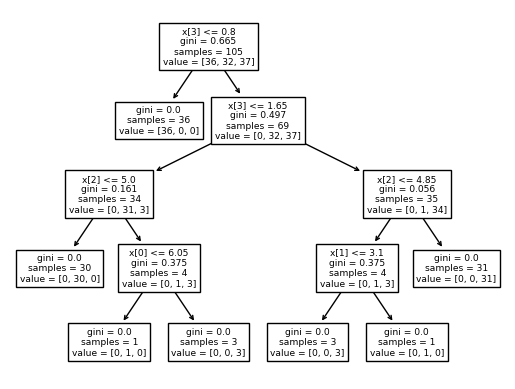

In [15]:
tree.plot_tree(cls)

In [16]:
data.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target,flower_species
0,5.1,3.5,1.4,0.2,0,setosa
1,4.9,3.0,1.4,0.2,0,setosa
2,4.7,3.2,1.3,0.2,0,setosa
3,4.6,3.1,1.5,0.2,0,setosa
4,5.0,3.6,1.4,0.2,0,setosa


In [17]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
sc.fit(X_train)

StandardScaler()

In [18]:
sepal_length_cm = float(input("Enter new sepal length (cm): "))
sepal_width_cm = float(input("Enter new sepal width (cm): "))
petal_length_cm = float(input("Enter new petal length (cm): "))
petal_width_cm = float(input("Enter new petal width (cm): "))
new_flower = [[sepal_length_cm,sepal_length_cm,petal_length_cm,petal_length_cm]]
transformed_new_flower = sc.transform(new_flower)
result = cls.predict(transformed_new_flower)
if result == 0 :
    print("The new flower species may be setosa")
elif result == 1:
   print("The new flower species may be Versicolor")
else :
   print("The new flower species may be Virginica")

Enter new sepal length (cm):  6.5
Enter new sepal width (cm):  8.9
Enter new petal length (cm):  3.9
Enter new petal width (cm):  9.9


The new flower species may be Versicolor


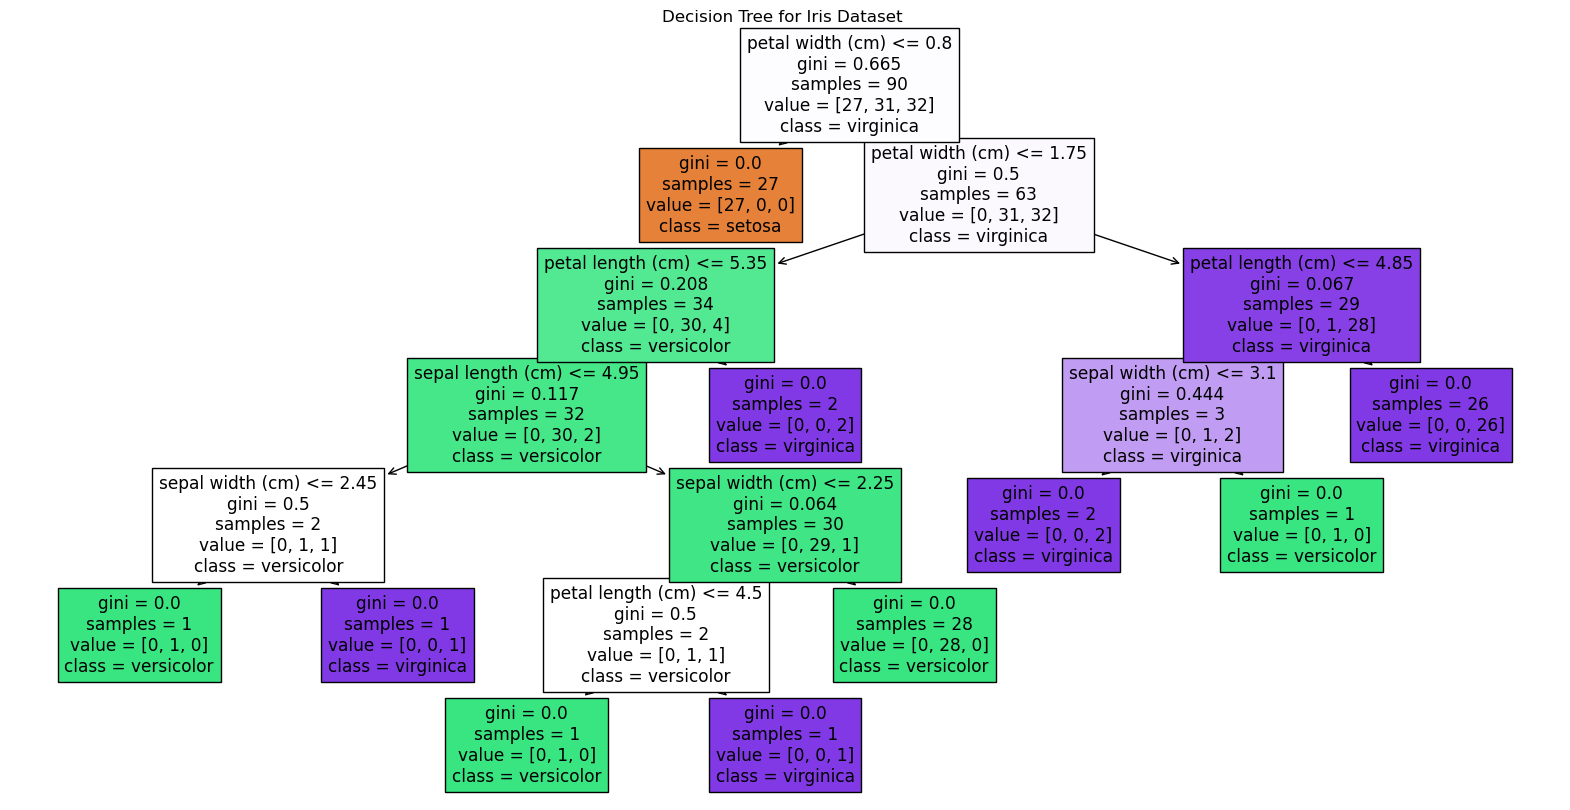

In [19]:
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.model_selection import train_test_split
iris = load_iris()
X,y = iris.data, iris.target
X_train , X_test, y_train , y_test = train_test_split(X, y, test_size = 0.4 , random_state=42)
clf = DecisionTreeClassifier()
clf.fit(X_train , y_train)
plt.figure(figsize= (20,10))
plot_tree(clf , feature_names = iris.feature_names, class_names = iris.target_names, filled= True)
plt.title('Decision Tree for Iris Dataset ')
plt.show()

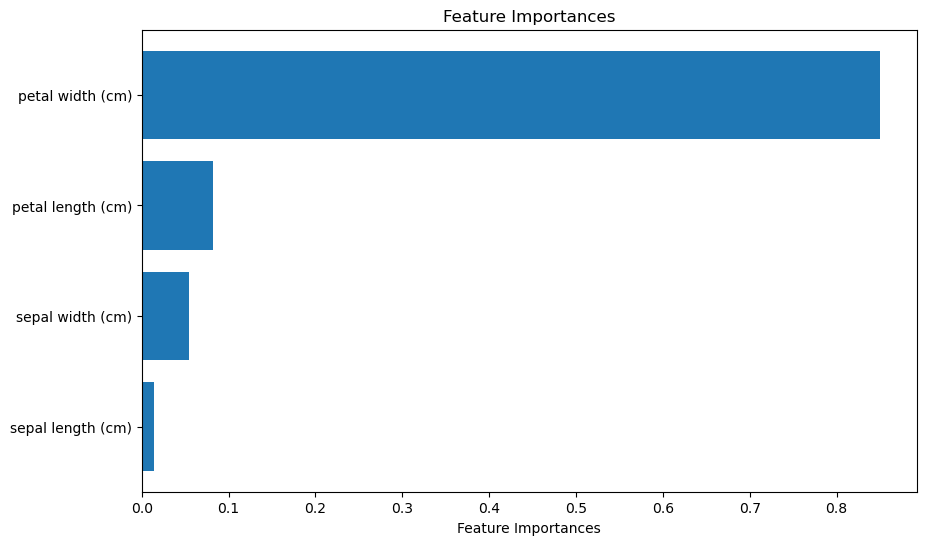

In [20]:
import numpy as np
importances = clf.feature_importances_
indices = np.argsort(importances)
plt.figure(figsize=(10,6))
plt.title('Feature Importances')
plt.barh(range(X.shape[1]) , importances[indices], align= 'center')
plt.yticks(range(X.shape[1]), [iris.feature_names[i]for i in indices])
plt.xlabel('Feature Importances')
plt.show()

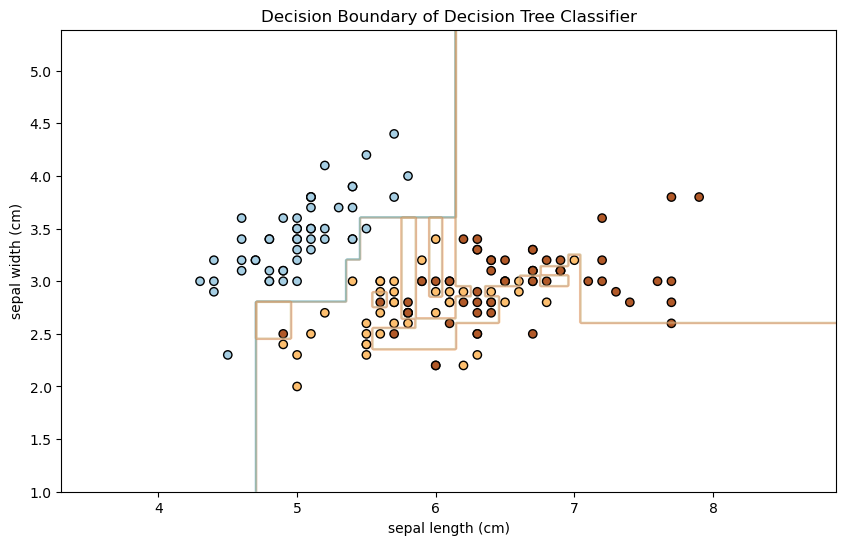

In [21]:
import numpy as np
X = iris.data[:,:2]
y = iris.target
X_train , X_test, y_train , y_test = train_test_split(X, y, test_size = 0.4 ,random_state=42)
clf = DecisionTreeClassifier()
clf.fit(X_train , y_train)
X_min , X_max = X[:, 0].min() - 1, X[:,0].max() +1
y_min , y_max = X[:,1].min() -1 ,X[:,1].max() +1
xx, yy = np.meshgrid(np.arange(X_min, X_max,0.01),np.arange(y_min, y_max,0.01))
Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)
plt.figure(figsize = (10,6))
plt.contour(xx , yy , Z, alpha = 0.3, cmap = plt.cm.Paired)
plt.scatter(X[:,0], X[:,1],c=y, edgecolor= 'k',cmap=plt.cm.Paired)
plt.xlabel('sepal length (cm)')
plt.ylabel('sepal width (cm)')
plt.title('Decision Boundary of Decision Tree Classifier')
plt.show()